# Questão 1.

Considere o problema de classificação de padrões bidimensionais constituído neste caso de 5 padrões. A distribuição dos padrões tem como base um quadrado centrado na origem interceptando os eixos nos pontos +1 e -1 de cada eixo. Os pontos +1 e -1 de cada eixo são centros de quatro semicírculos que se interceptam no interior do quadrado originando quatro classes e a quinta classe corresponde as regiões de não interseção. Após gerar aleatoriamente os dados que venham formar estas distribuições, selecione um conjunto de treinamento e um conjunto de teste. Defina a arquitetura da rede Deep MLP, treine a rede neural e apresente o desempenho da rede, no caso um classificador neural usando o conjunto de teste, calculando a matriz de confusão.

## Imports das bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Função para desenhar um semi-círculo e verificar se um ponto está dentro dele

In [6]:
def desenha_semicirculo(ax, c, r, orientacao, cor):
    t = np.linspace(0, np.pi, 100)
    if orientacao == 'cima':
        x = c[0] - r * np.cos(t)
        y = c[1] + r * np.sin(t)
    elif orientacao == 'baixo':
        x = c[0] + r * np.cos(t)
        y = c[1] - r * np.sin(t)
    elif orientacao == 'esquerda':
        x = c[0] + r * (np.sin(t))
        y = c[1] + r * (np.cos(t))
    elif orientacao == 'direita':
        x = c[0] + r * (-np.sin(t))
        y = c[1] - r * (np.cos(t))
    ax.fill(x, y, color=cor, alpha=0.5)

def dentro_semicirculo(x, y, cx, cy):
    if cx != 0:
        return (x - cx)**2 + (y - cy)**2 <= 1
    else:
        return (x - cx)**2 + (y - cy)**2 <= 1

## Desenhando a região

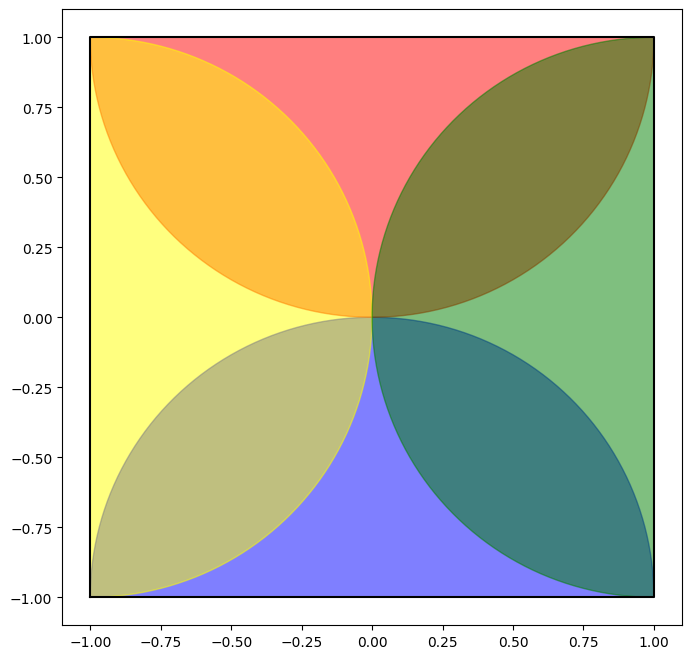

In [7]:
plt.figure(figsize=(8, 8))

plt.plot([-1, 1, 1, -1, -1], [-1, -1, 1, 1, -1], 'k-')

ax = plt.gca()
desenha_semicirculo(ax, (0, -1), 1, 'cima', 'blue')
desenha_semicirculo(ax, (0, 1), 1, 'baixo', 'red')
desenha_semicirculo(ax, (-1, 0), 1, 'esquerda', 'yellow')
desenha_semicirculo(ax, (1, 0), 1, 'direita', 'green')

## Geração, distribuição dos dados e separação do dados de treinamento e dados de teste

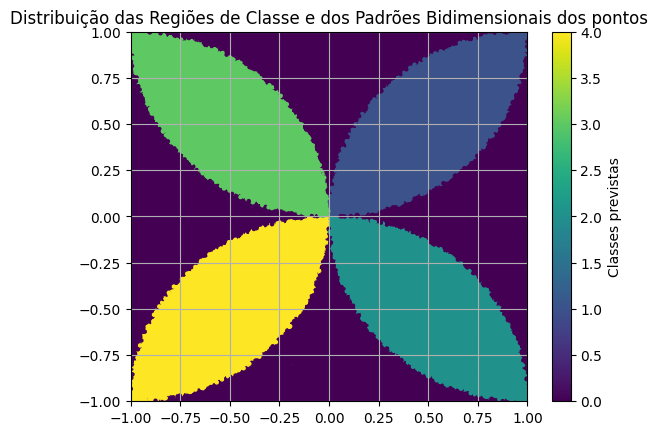

In [27]:
qtdPontos = 20000

# Gerar pontos aleatórios no quadrado -1<=x<=1 e -1<=y<=1
pontos = np.random.uniform(-1, 1, (qtdPontos * 5, 2))
labels = np.zeros((qtdPontos * 5,))

# Rotulação das classes (fora -> superior direito -> sentido anti-horário)
for i, (x, y) in enumerate(pontos):
    if dentro_semicirculo(x, y, 1, 0) and dentro_semicirculo(x, y, -1, 0) and dentro_semicirculo(x, y, 0, 1) and dentro_semicirculo(x, y, 0, -1):
        labels[i] = 0
    elif dentro_semicirculo(x, y, 1, 0) and dentro_semicirculo(x, y, 0, 1):
        labels[i] = 1
    elif dentro_semicirculo(x, y, 1, 0) and dentro_semicirculo(x, y, 0, -1):
        labels[i] = 2
    elif dentro_semicirculo(x, y, 0, 1) and dentro_semicirculo(x, y, -1, 0):
        labels[i] = 3
    elif dentro_semicirculo(x, y, 0, -1) and dentro_semicirculo(x, y, -1, 0):
        labels[i] = 4

# Desenhar os cículos e os a distribuição dos pontos
ax = plt.gca()
desenha_semicirculo(ax, (0, -1), 1, 'cima', 'blue')
desenha_semicirculo(ax, (0, 1), 1, 'baixo', 'red')
desenha_semicirculo(ax, (-1, 0), 1, 'esquerda', 'yellow')
desenha_semicirculo(ax, (1, 0), 1, 'direita', 'green')

# Plotar os pontos e como eles se distribuem pelas classes
plt.scatter(pontos[:, 0], pontos[:, 1], c=labels, cmap='viridis', s=5)
plt.colorbar(label='Classes previstas')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.title('Distribuição das Regiões de Classe e dos Padrões Bidimensionais dos pontos')
plt.grid(True)
plt.show()

# Divisão dos dados de treinamento e dados de teste
X_train, X_val, y_train, y_val = train_test_split(pontos, labels, test_size=0.2, random_state=42, stratify=labels)

#Definição do modelo

In [15]:
# Definir a arquitetura da rede neural
model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(5, activation='softmax')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

# Avaliar o desempenho no conjunto de validação
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

Epoch 1/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8261 - loss: 0.4364 - val_accuracy: 0.9579 - val_loss: 0.1116
Epoch 2/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9598 - loss: 0.1031 - val_accuracy: 0.9456 - val_loss: 0.1190
Epoch 3/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9667 - loss: 0.0829 - val_accuracy: 0.9691 - val_loss: 0.0691
Epoch 4/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9709 - loss: 0.0745 - val_accuracy: 0.9708 - val_loss: 0.0764
Epoch 5/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9727 - loss: 0.0684 - val_accuracy: 0.9731 - val_loss: 0.0623
Epoch 6/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9727 - loss: 0.0658 - val_accuracy: 0.9682 - val_loss: 0.0790
Epoch 7/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9729 - loss: 0.0646 - val_accuracy: 0.9761 - val_loss: 0.0535
Epoch 8/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9743 - loss: 0.0632

## Matriz de confusão

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


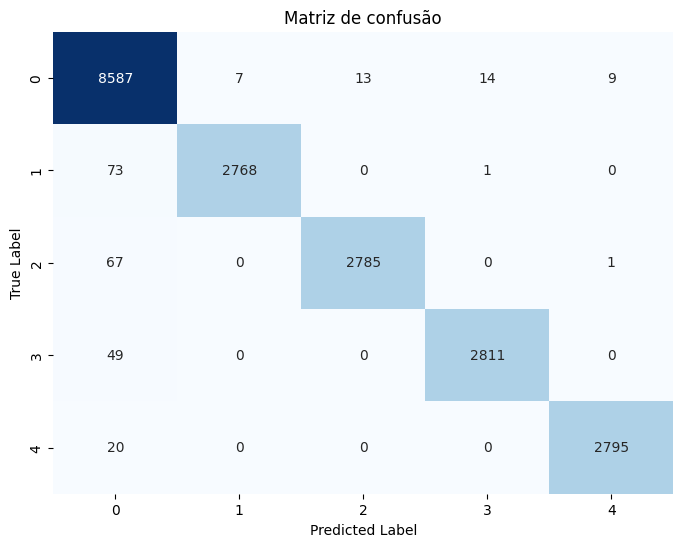

In [22]:
y_pred = np.argmax(model.predict(X_val), axis=1)

# Calcular a matriz de confusão
conf_mat = confusion_matrix(y_val, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de confusão')
plt.show()

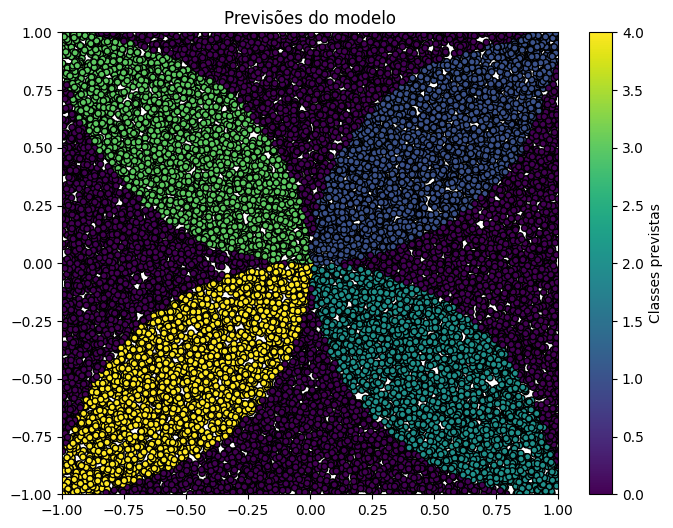

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(X_val[:, 0], X_val[:, 1], c=y_pred, cmap='viridis', s=20, edgecolor='k')
plt.title('Previsões do modelo')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.colorbar(label='Classes previstas')
plt.show()